In [2]:
import itk
from itkwidgets import view
import numpy as np

In [3]:
fc_probmap = itk.imread('../oai-analysis-test-data/colab_case/FC_probmap.nii.gz')


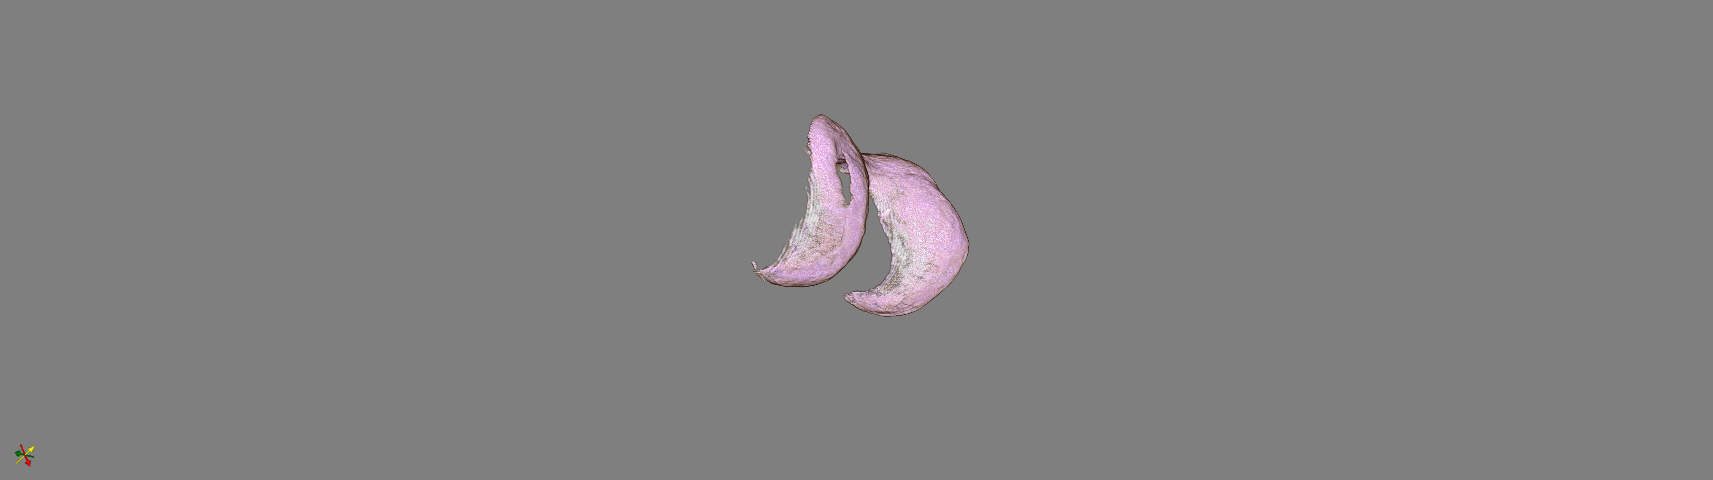
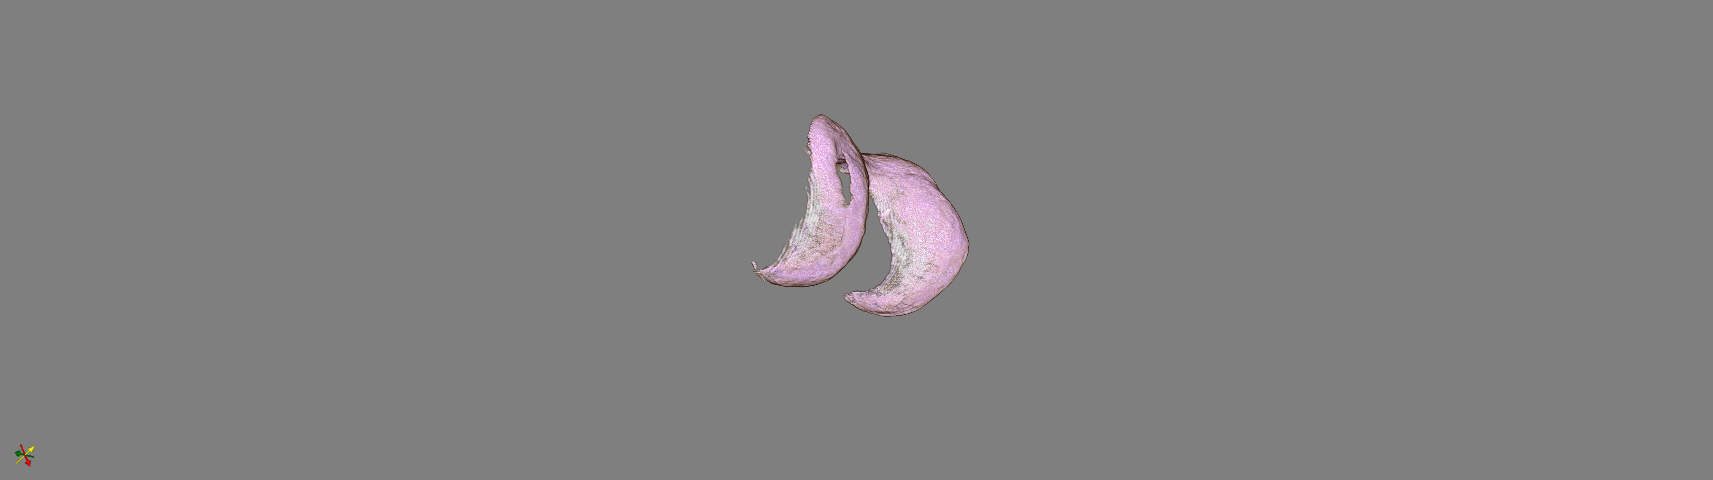

<IPython.core.display.Javascript object>

In [4]:
view(fc_probmap)

In [6]:
mask = itk.binary_threshold_image_filter(fc_probmap, lower_threshold=0.1, inside_value=10.0, outside_value=0.0)


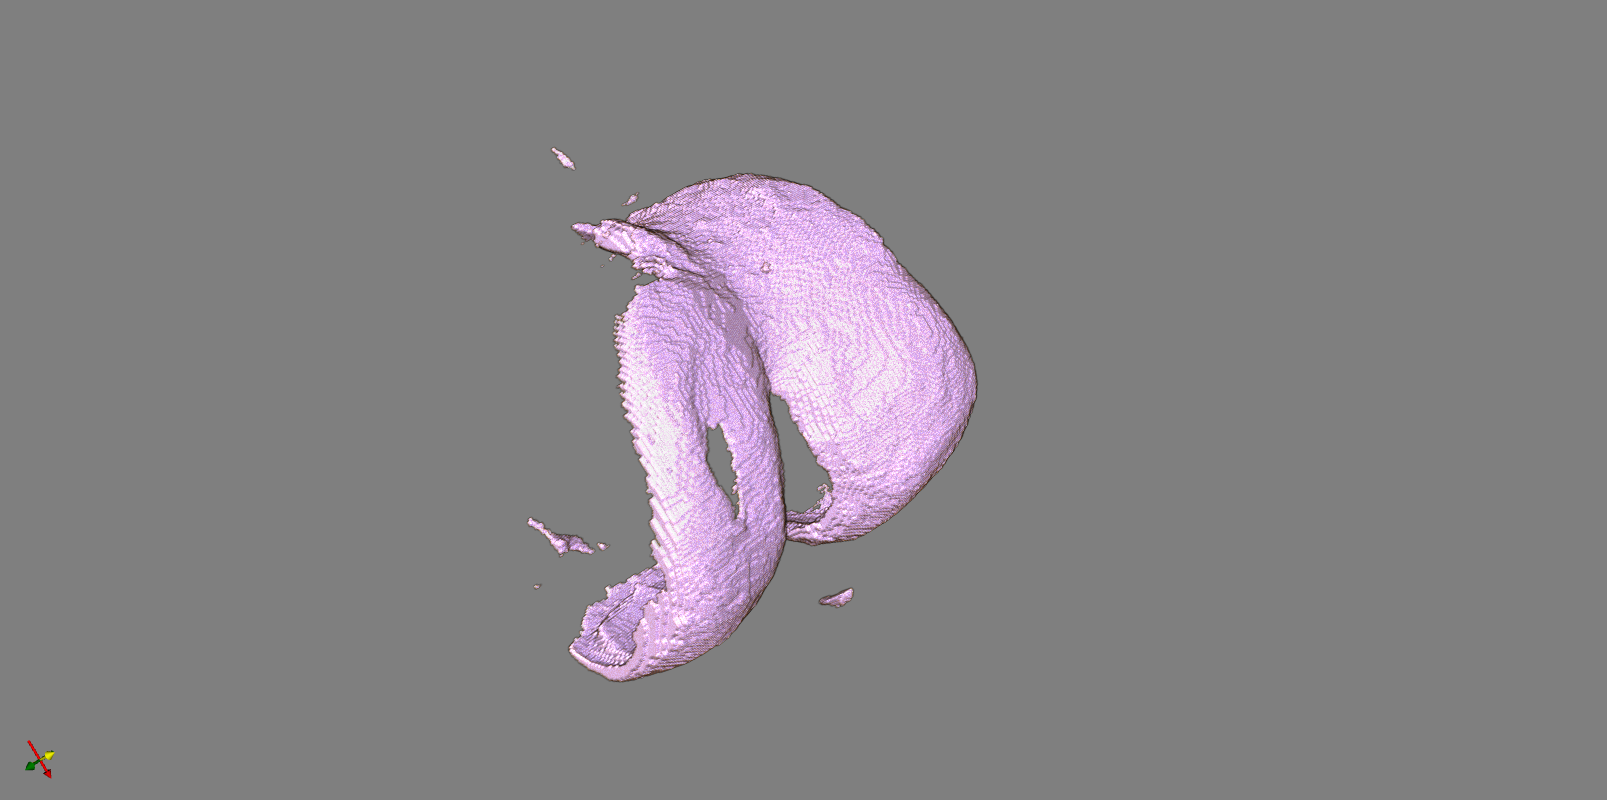
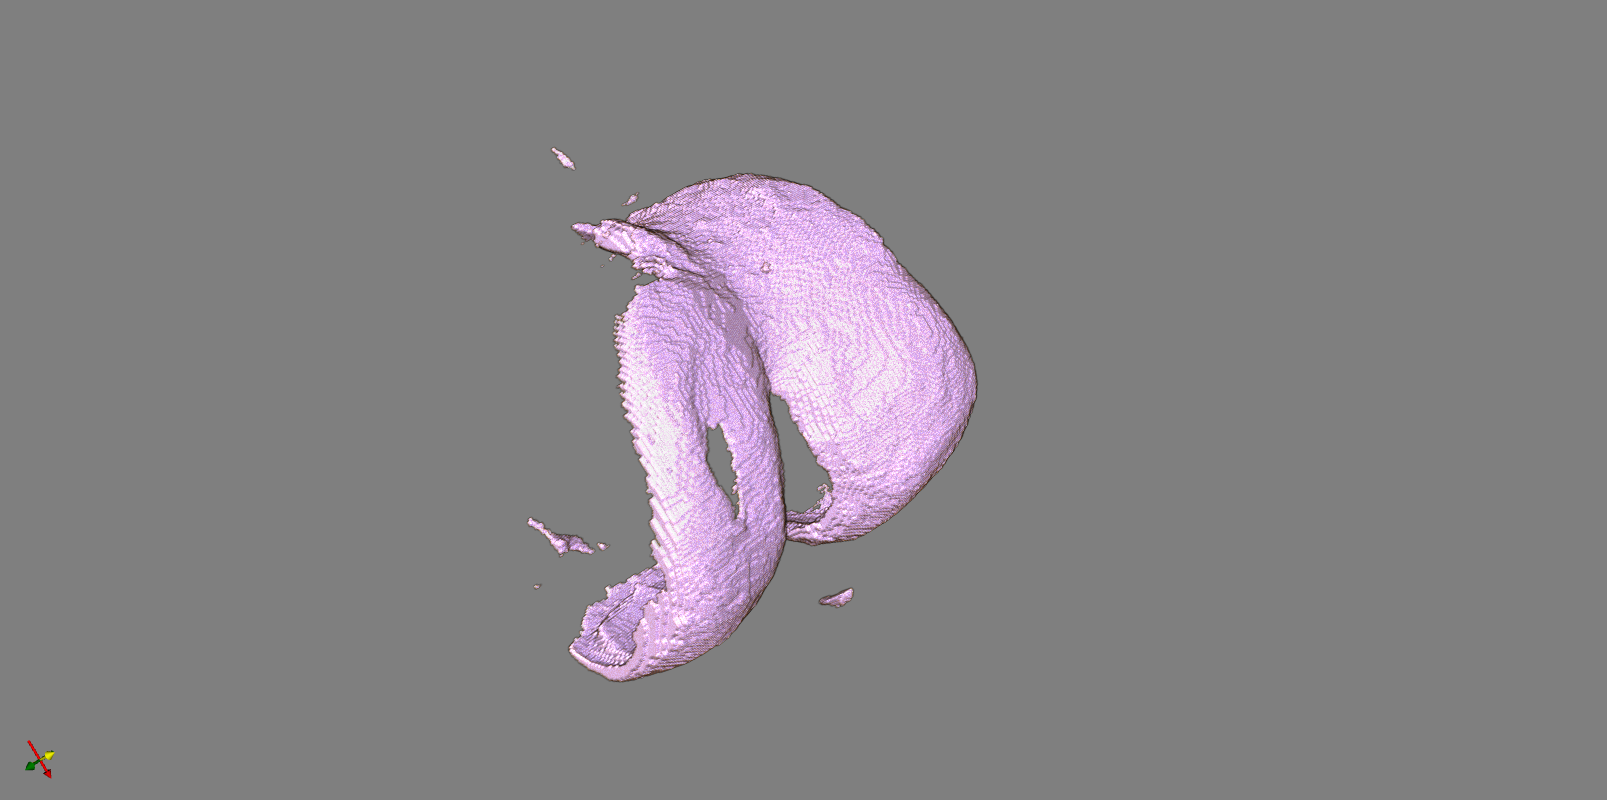

<IPython.core.display.Javascript object>

In [12]:
view(image=mask)

In [13]:
distance = itk.signed_maurer_distance_map_image_filter(mask.astype(np.uint8), inside_is_positive=True)
masked_distance = itk.mask_image_filter(distance, mask_image=mask.astype(itk.SS))


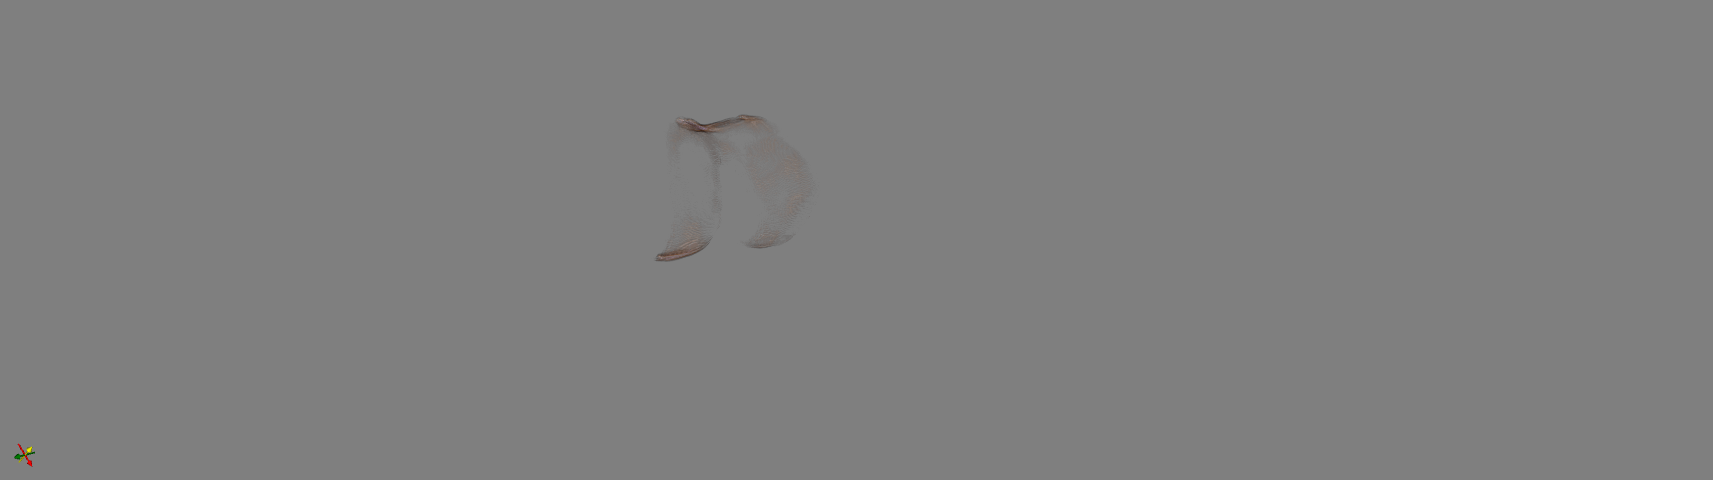
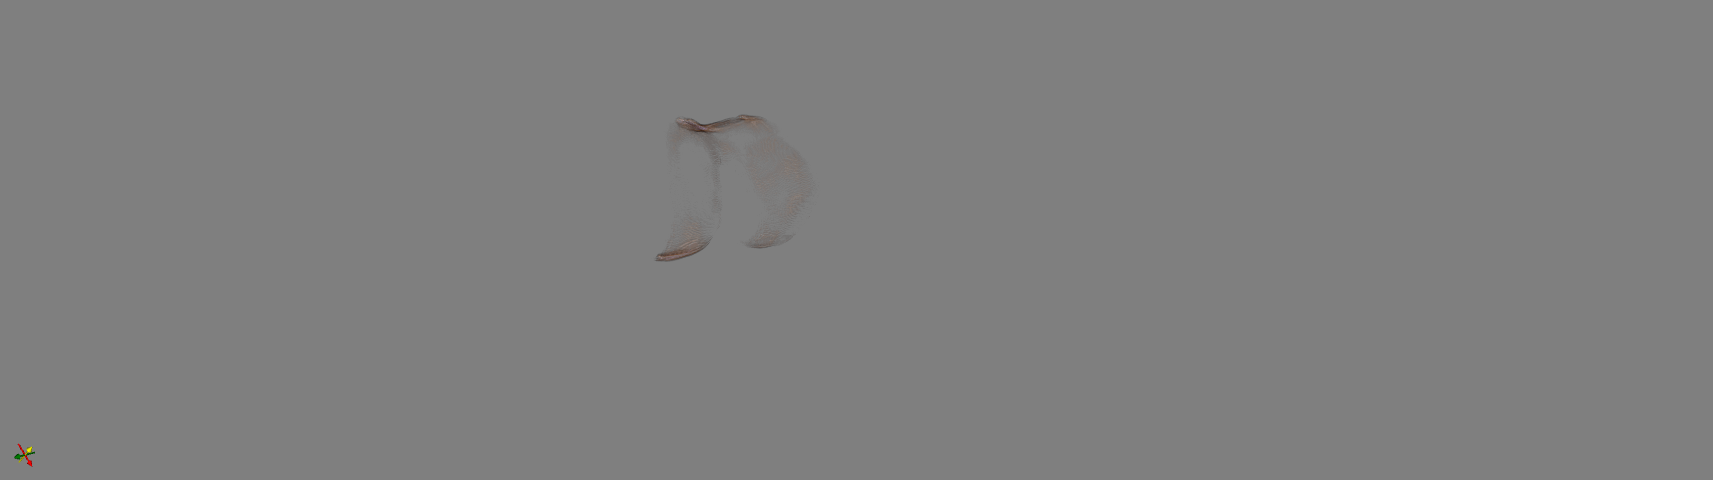

<IPython.core.display.Javascript object>

In [84]:
view(masked_distance)

In [7]:
distance_pixels = itk.signed_maurer_distance_map_image_filter(mask.astype(np.uint8), inside_is_positive=True, use_image_spacing=False)
masked_distance_pixels = itk.mask_image_filter(distance_pixels, mask_image=mask.astype(itk.SS))


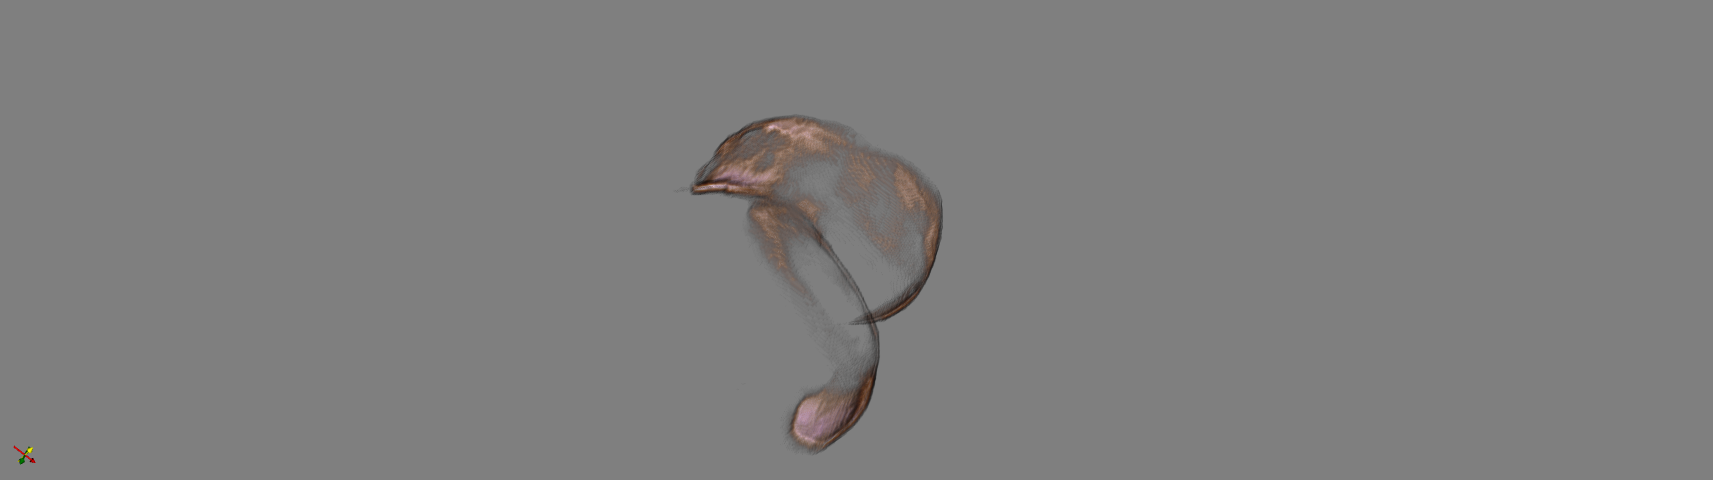
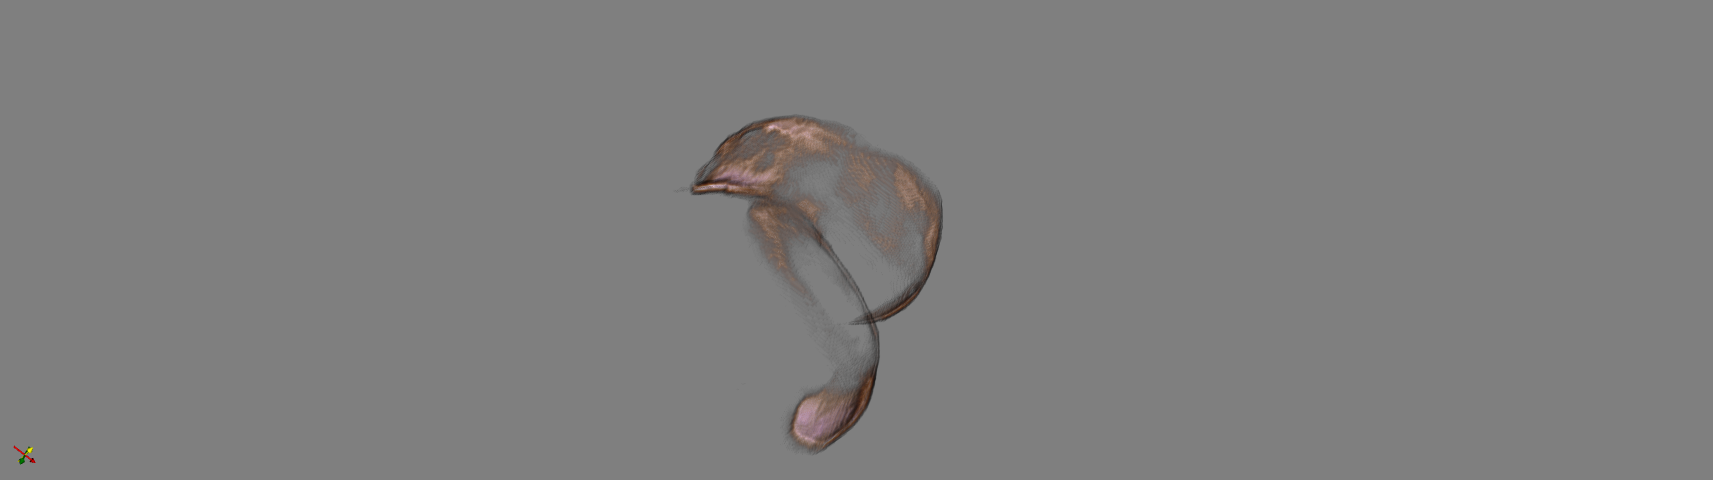

<IPython.core.display.Javascript object>

In [8]:
view(masked_distance_pixels)

In [9]:
np.max(masked_distance_pixels)

5.3851647

In [10]:
n_dilations = int(np.ceil(np.max(masked_distance_pixels)))

In [14]:
thickness = masked_distance
for iteration in reversed(range(1, n_dilations)):
    print(iteration)
    max_dist = 100.0
    # inside_value must be larger than the largest thickness for the geodesic dilation
    distance_pixels_mask = itk.binary_threshold_image_filter(masked_distance_pixels,
                                                             lower_threshold=float(iteration),
                                                             inside_value=max_dist,
                                                             outside_value=0.0)
    masked_thickness = itk.mask_image_filter(thickness,
                                             mask_image=distance_pixels_mask.astype(itk.SS),
                                             masking_value=0)
    dilated = itk.grayscale_geodesic_dilate_image_filter(marker_image=masked_thickness,
                                                         mask_image=distance_pixels_mask.astype(itk.F),
                                                         run_one_iteration=True,
                                                         fully_connected=True,
                                                         ttype=(type(masked_distance), type(masked_distance)))
    masked_thickness_comp = np.where(np.asarray(distance_pixels_mask) != max_dist, np.asarray(thickness), 0)
    masked_thickness_comp = itk.image_from_array(masked_thickness_comp)
    masked_thickness_comp.CopyInformation(thickness)

    thickness = itk.add_image_filter(dilated, masked_thickness_comp)

5
4
3
2
1



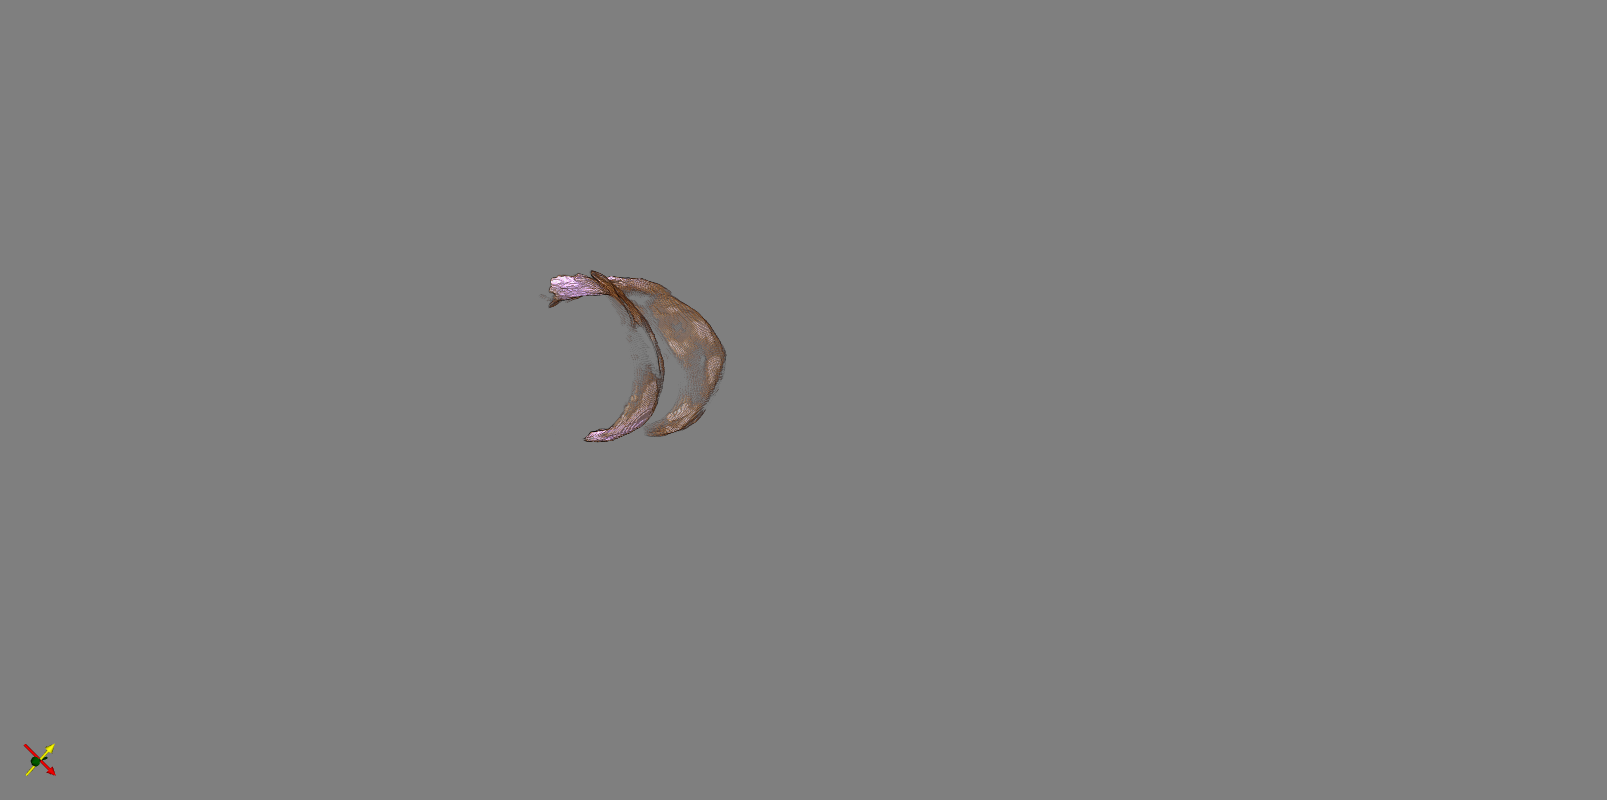
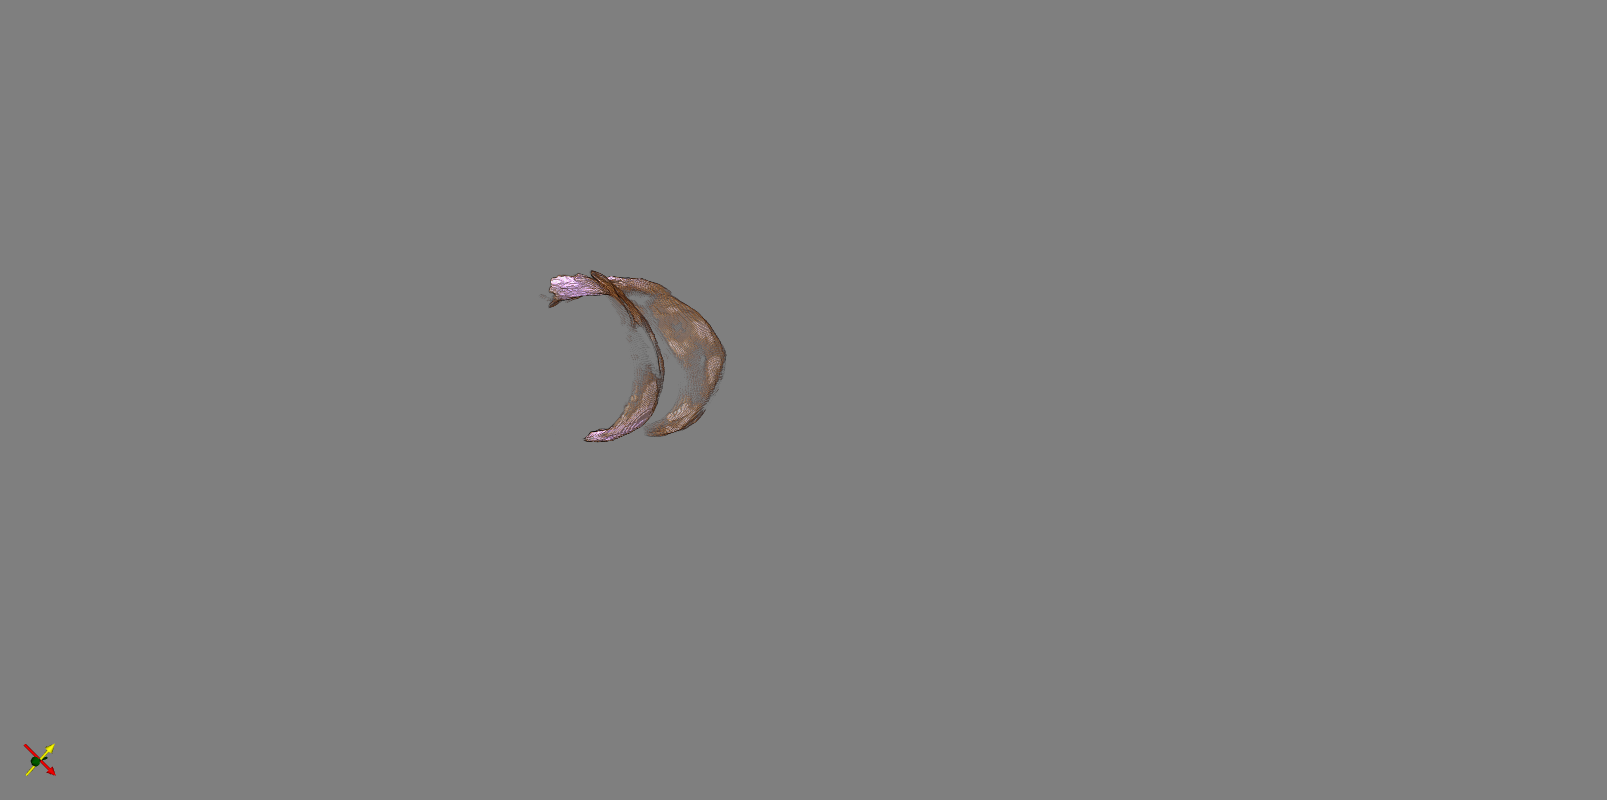

<IPython.core.display.Javascript object>

In [15]:
view(thickness)